In [1]:
from decouple import config
import tweepy
import basilica
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#Import Keys
TWITTER_AUTH = tweepy.OAuthHandler(
    config('TWITTER_CONSUMER_KEY'),
    config('TWITTER_CONSUMER_SECRET'))
TWITTER_AUTH.set_access_token(
    config('TWITTER_ACCESS_TOKEN'),
    config('TWITTER_ACCESS_TOKEN_SECRET'))
TWITTER = tweepy.API(TWITTER_AUTH)
BASILICA = basilica.Connection(config('BASILICA_KEY'))

In [2]:
# Create user object

user = TWITTER.get_user('matt42kirby')

In [3]:
# Fetch follower ids
followers = user.followers_ids()[:10]

# Create dict with follower ids and screen names
follower_dict = {follower: TWITTER.get_user(follower).screen_name for follower in followers}
follower_dict

{4186830016: 'z_landsman',
 1046903019772760064: 'DataLovecraft',
 1196282874170937344: 'albertm04163195',
 926150184890859520: 'MeetPat07478957',
 1221530842494906368: 'rebekkahhernan',
 1063813809301794816: 'Dwell_atHome',
 144231081: 'Casillic',
 1131194479065542656: 'Inc_Outlook',
 25582250: 'ThisIsJorgeLima',
 262501819: 'Helmine_14748'}

In [4]:
# Initialize Graph
user_graph = nx.DiGraph()

# Add nodes for followers
user_graph.add_nodes_from(follower_dict)

# Add follower edges
for i in list(follower_dict.keys()):
    user_graph.add_edge(i, user.id)


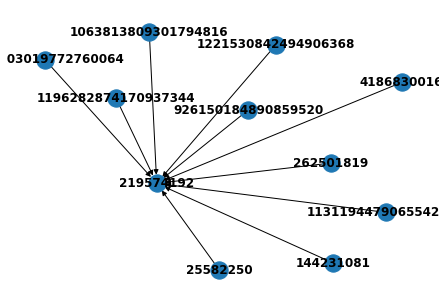

In [5]:
# Draw the graph
nx.draw(user_graph, with_labels=True, font_weight='bold')

In [6]:
import plotly.graph_objects as go

In [7]:
for edge in user_graph.edges():
    print(list(user_graph.nodes))
    

[4186830016, 1046903019772760064, 1196282874170937344, 926150184890859520, 1221530842494906368, 1063813809301794816, 144231081, 1131194479065542656, 25582250, 262501819, 219574192]
[4186830016, 1046903019772760064, 1196282874170937344, 926150184890859520, 1221530842494906368, 1063813809301794816, 144231081, 1131194479065542656, 25582250, 262501819, 219574192]
[4186830016, 1046903019772760064, 1196282874170937344, 926150184890859520, 1221530842494906368, 1063813809301794816, 144231081, 1131194479065542656, 25582250, 262501819, 219574192]
[4186830016, 1046903019772760064, 1196282874170937344, 926150184890859520, 1221530842494906368, 1063813809301794816, 144231081, 1131194479065542656, 25582250, 262501819, 219574192]
[4186830016, 1046903019772760064, 1196282874170937344, 926150184890859520, 1221530842494906368, 1063813809301794816, 144231081, 1131194479065542656, 25582250, 262501819, 219574192]
[4186830016, 1046903019772760064, 1196282874170937344, 926150184890859520, 1221530842494906368,

In [16]:
G = nx.random_geometric_graph(200, 0.125)

In [17]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

In [18]:
#d = dict(TWITTER.rate_limit_status())
#d

In [19]:
node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

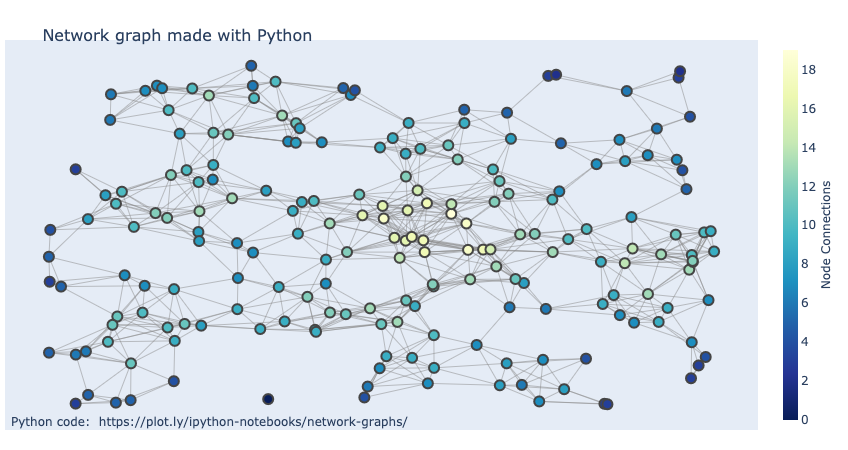

In [20]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

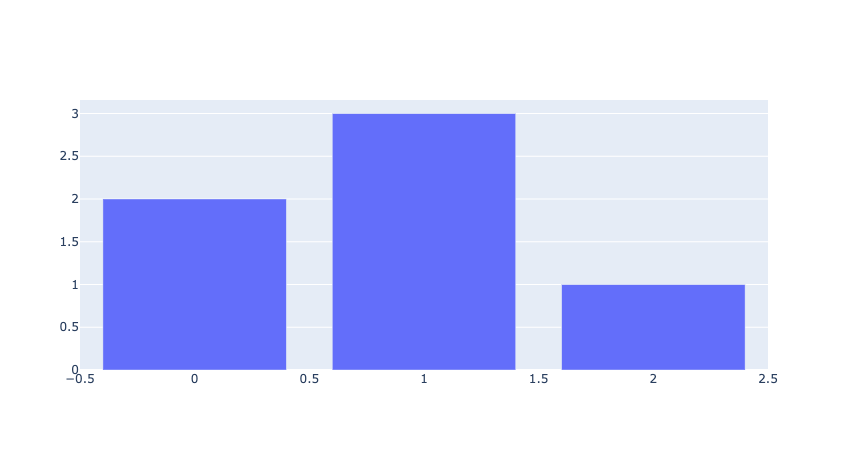

In [21]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()